In [ ]:
import pandas as pd 
import numpy as np

In [2]:
cars = pd.read_csv('data/usedcars.csv')
cars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [5]:
cars[["model","color"]].value_counts().sort_index()

model  color 
SE     Black     19
       Blue       9
       Gold       1
       Gray       7
       Green      4
       Red       12
       Silver    11
       White     14
       Yellow     1
SEL    Black      3
       Blue       3
       Gray       5
       Green      1
       Red        2
       Silver     7
       White      1
       Yellow     1
SES    Black     13
       Blue       5
       Gray       4
       Red       11
       Silver    14
       White      1
       Yellow     1
dtype: int64

In [7]:
cars[cars.model=='SE']

,year,model,price,mileage,color,transmission
4,2012,SE,17500,8367,White,AUTO
14,2011,SE,16000,15367,White,AUTO
22,2011,SE,15899,36685,Silver,AUTO
25,2010,SE,15500,29338,Blue,AUTO
26,2010,SE,15499,7784,Black,AUTO
...,...,...,...,...,...,...
142,2000,SE,6980,60161,Green,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [10]:
cars.groupby('model').size()

model
SE     78
SEL    23
SES    49
dtype: int64

In [12]:
cars.groupby('model').mean()[['price','mileage']]

,price,mileage
model,,
SE,12202.128205,46541.269231
SEL,16109.260870,26238.913043
SES,12694.102041,49089.448980


In [14]:
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance.groupby('smoker').describe()['charges']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [18]:
insurance.groupby(['smoker','gender']).describe()['charges']

count          mean           std         min           25%  \
smoker gender                                                                
no     female  547.0   8762.297300   6060.775970   1607.5101   4265.599100   
       male    517.0   8087.204731   5908.108989   1121.8739   3659.346000   
yes    female  115.0  30678.996276  11907.536381  13844.5060  19696.432100   
       male    159.0  33042.005975  11202.670862  12829.4551  21241.526875   

                       50%          75%          max  
smoker gender                                         
no     female   7639.41745  11786.16660  36910.60803  
       male     6985.50695  10959.33000  32108.66282  
yes    female  28950.46920  40918.31450  63770.42801  
       male    36085.21900  41797.58905  62592.87309

In [27]:
pd.pivot_table(cars,values='price',columns='color',index='model',aggfunc='max',fill_value=0)

color,Black,Blue,Gold,Gray,Green,Red,Silver,White,Yellow
model,,,,,,,,,
SE,15499,15500,10955,13895,13992,14499,15899,17500,4899
SEL,15889,17000,0,20995,16950,14355,19995,15980,21992
SES,16995,15999,0,15298,0,16950,16995,7900,7999


In [28]:
population = pd.read_csv('data/population.csv')
population.shape

(217, 61)

In [31]:
population.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,2.24,1.43,0.824,0.58,0.574,0.6,0.591,0.572,0.61,...,0.378,0.503,0.583,0.591,0.541,0.503,0.472,0.459,0.437,0.428
1,Afghanistan,1.9,1.97,2.03,2.09,2.15,2.17,2.19,2.25,2.38,...,3.14,3.41,3.49,3.36,3.08,2.78,2.55,2.38,2.31,2.3
2,Angola,1.39,1.38,1.26,0.974,0.618,0.186,−0.119,−0.0427,0.548,...,3.63,3.6,3.55,3.5,3.44,3.38,3.32,3.28,3.24,3.22
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.269,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.578
4,Andorra,6.97,6.73,6.47,6.25,5.98,5.78,5.52,5.28,5.19,...,−0.839,−1.59,−2.03,−1.95,−1.55,−0.899,−0.386,0.0143,0.179,0.154


In [35]:
population_long = pd.melt(frame=population,id_vars = 'country',var_name='year',value_name="Growth%")
population_long.shape

(13020, 3)

In [36]:
population[population.country=='India']

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
88,India,2,2.03,2.06,2.07,2.08,2.08,2.09,2.11,2.15,...,1.29,1.23,1.18,1.15,1.12,1.09,1.06,1.04,1.01,0.989


In [37]:
population_long[population_long.country=='India']

,country,year,Growth%
88,India,1961,2
305,India,1962,2.03
522,India,1963,2.06
739,India,1964,2.07
956,India,1965,2.08
1173,India,1966,2.08
1390,India,1967,2.09
1607,India,1968,2.11
1824,India,1969,2.15
2041,India,1970,2.2


In [42]:
population_long[population_long.country=='India']

,country,year,Growth%
88,India,1970,2.2
305,India,1980,2.31
522,India,1990,2.08
739,India,2000,1.77
956,India,2010,1.35
1173,India,2020,0.989


In [40]:
population_long = pd.melt(frame=population,id_vars = 'country',value_vars=["1970","1980","1990","2000","2010","2020"],var_name='year',value_name="Growth%")
population_long.shape

(1302, 3)

In [41]:
population_long

,country,year,Growth%
0,Aruba,1970,0.57
1,Afghanistan,1970,2.54
2,Angola,1970,1.48
3,Albania,1970,2.55
4,Andorra,1970,5.17
...,...,...,...
1297,Samoa,2020,0.666
1298,Yemen,2020,2.25
1299,South Africa,2020,1.27
1300,Zambia,2020,2.89


In [45]:
population_wide = pd.pivot(data=population_long,index='country',columns='year',values='Growth%').reset_index()
population_wide.shape

(217, 7)

In [46]:
population_wide.head()

year,country,1970,1980,1990,2000,2010,2020
0,Afghanistan,2.54,−0.408,4.48,2.98,2.75,2.3
1,Albania,2.55,2.05,1.8,−0.637,−0.496,−0.578
2,Algeria,2.83,3.03,2.57,1.36,1.8,1.84
3,American Samoa,2.46,2.5,3.13,1.34,−1.05,−0.208
4,Andorra,5.17,3.49,3.84,1.58,−0.00829,0.154


In [47]:
population_long.head()

,country,year,Growth%
0,Aruba,1970,0.57
1,Afghanistan,1970,2.54
2,Angola,1970,1.48
3,Albania,1970,2.55
4,Andorra,1970,5.17


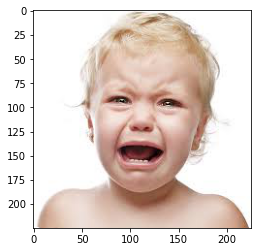

In [58]:
import matplotlib.pyplot as plt
px = plt.imread('data/image3.jpg')
plt.imshow(px)
plt.show()

In [59]:
from fer import FER
emotion = FER()
emotion.detect_emotions(px)

[{'box': array([ 48,  43, 129, 129]),
  'emotions': {'angry': 0.07,
   'disgust': 0.0,
   'fear': 0.02,
   'happy': 0.0,
   'sad': 0.9,
   'surprise': 0.0,
   'neutral': 0.0}}]